# Figure 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## For three frequencies `(f0,f1,f2)` determine the resonance order.

In [2]:
def resonance_order_calculator(f0,f1,f2):
    # Define wide range of integers to examine.
    x = np.arange(-100,101)
    y = np.arange(-100,101)
    z = np.arange(-100,101)
    good = np.where(x != 0)                             # ignore k=0
    x = x[good]; y=y[good]; z=z[good]
    
    # Organize into 3D grids for efficiency
    k0,_,_ = np.meshgrid(x,y,z)
    k1 = k0.transpose(2,0,1)
    k2 = k0.transpose(1,0,2)
    
    # Compute sum for all integers.
    resonance_search = k0*f0 + k1*f1 + k2*f2;
    resonance_search = np.round(resonance_search,10);   # Round near 0 to 0.
    mn = np.min(np.abs(resonance_search))               # ... and look for 0.
    
    if mn == 0:                                         # If you find 0
        ind = np.where(resonance_search==mn);           # ... get the resonance order,
        resonance_order = np.abs(k0[ind]) + np.abs(k1[ind]) + np.abs(k2[ind]);
        imn             = np.argmin(resonance_order[resonance_order > 0])
        resonance_order = np.min(   resonance_order[resonance_order > 0]);
        ix=ind[0][imn]
        iy=ind[1][imn]
        iz=ind[2][imn]
        K = [k0[ix,iy,iz], k1[ix,iy,iz], k2[ix,iy,iz]]; # ... and get the coefficients.
    else:
        resonance_order = np.array([]); K = np.array([]);
    return resonance_order, K

## Create resonance order map for target frequency 40 Hz (slow to run).

In [3]:
target_frequency = 40;
golden           = (1+np.sqrt(5))/2
powers           = np.arange(-5,5)
freqs            = target_frequency*golden**powers

res = np.empty([np.size(freqs),np.size(freqs)])
res[:] = np.nan
print("Golden rhythms with target frequency " '%.1f' % target_frequency)
for idx2, f2 in enumerate(freqs):
    print(" "'%.1f' % f2)
    for idx1, f1 in enumerate(freqs):
        resonance_order,_ = resonance_order_calculator(target_frequency,f1,f2)
        if resonance_order.size!=0:
            res[idx2,idx1]    = resonance_order

Golden rhythms with target frequency 40.0
 3.6
 5.8
 9.4
 15.3
 24.7
 40.0
 64.7
 104.7
 169.4
 274.2


## Display the example resonance order map (fast to run).

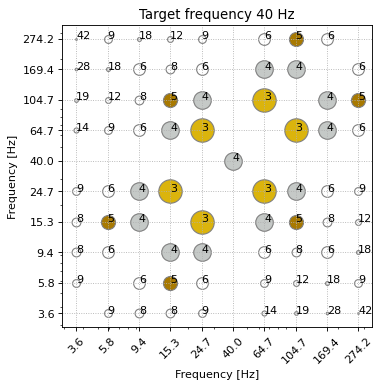

In [4]:
fig = plt.figure(figsize=(5, 5), dpi=80)
ax  = fig.add_subplot(1, 1, 1)
for idx2, f2 in enumerate(freqs):
    for idx1, f1 in enumerate(freqs):
        if np.isnan(res[idx1,idx2])==0:
            if res[idx1,idx2]==3: color='xkcd:gold'
            if res[idx1,idx2]==4: color='xkcd:silver'
            if res[idx1,idx2]==5: color='xkcd:bronze'
            if res[idx1,idx2] >5: color='white'
            ax.scatter(f2,f1,s=4000/res[idx1,idx2]**2,c=color,edgecolor='gray')
            plt.text(  f2,f1, '%.0f' % res[idx1,idx2])

ax.set_xscale('log'); ax.set_xticks(freqs); ax.set_xticklabels(('%.1f' % f0 for f0 in freqs), rotation=45);
ax.set_yscale('log'); ax.set_yticks(freqs); ax.set_yticklabels(('%.1f' % f0 for f0 in freqs));
plt.xlabel('Frequency [Hz]'); plt.ylabel('Frequency [Hz]')
plt.title('Target frequency '+str(target_frequency)+' Hz');
plt.grid(linestyle=':')
fig.savefig("Figure-4.pdf", bbox_inches='tight')
